In [62]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [63]:
train.head()
test.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [64]:
# submission 에 붙일 test_id 따로 떼어 놓기

test_id = test.pop('ID')
train_id = train.pop('ID')

In [65]:
train.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


column에 괄호가 있는게 불편하니 괄호 제거

In [66]:
train.columns = train.columns.str.replace(r'\(.*?\)','',regex = True)
test.columns = test.columns.str.replace(r'\(.*?\)','',regex = True)


In [67]:
train.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리,보증기간,사고이력,연식,가격
0,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


<ipython-input-68-1aa6fad95103>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_price_by_drive.index, y=mean_price_by_drive.values, palette="Set2")
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


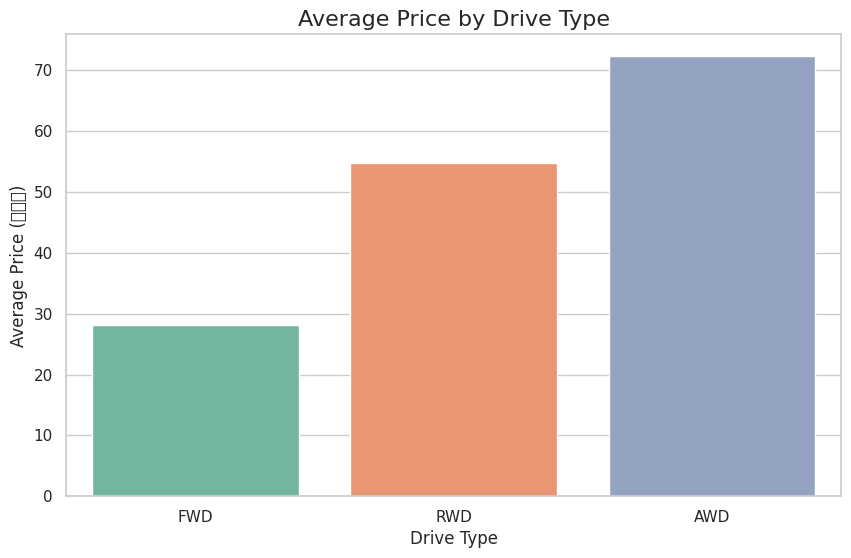

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 구동방식별 평균 가격 (막대그래프)
plt.figure(figsize=(10, 6))
mean_price_by_drive = train.groupby('구동방식')['가격'].mean().sort_values()
sns.barplot(x=mean_price_by_drive.index, y=mean_price_by_drive.values, palette="Set2")
plt.title('Average Price by Drive Type', fontsize=16)
plt.xlabel('Drive Type', fontsize=12)
plt.ylabel('Average Price (백만원)', fontsize=12)
plt.show()


<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:9: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-inpu

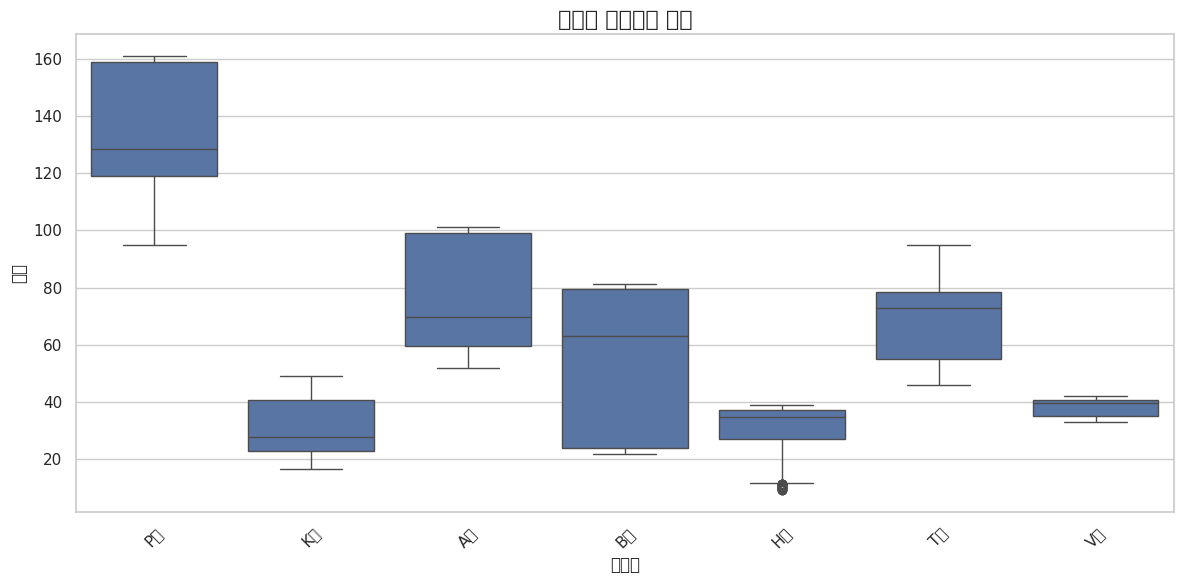

<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:18: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ip

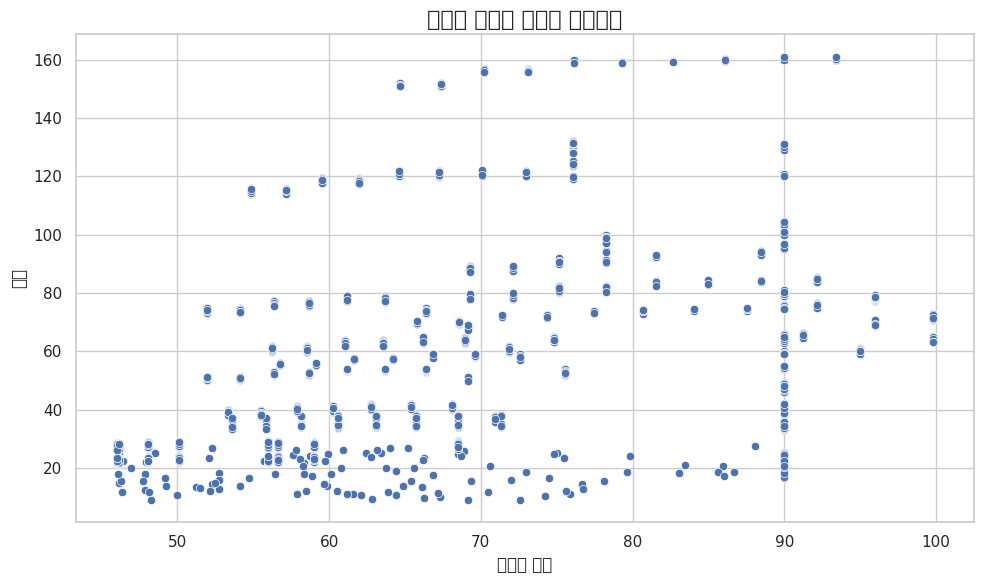

<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:25: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ip

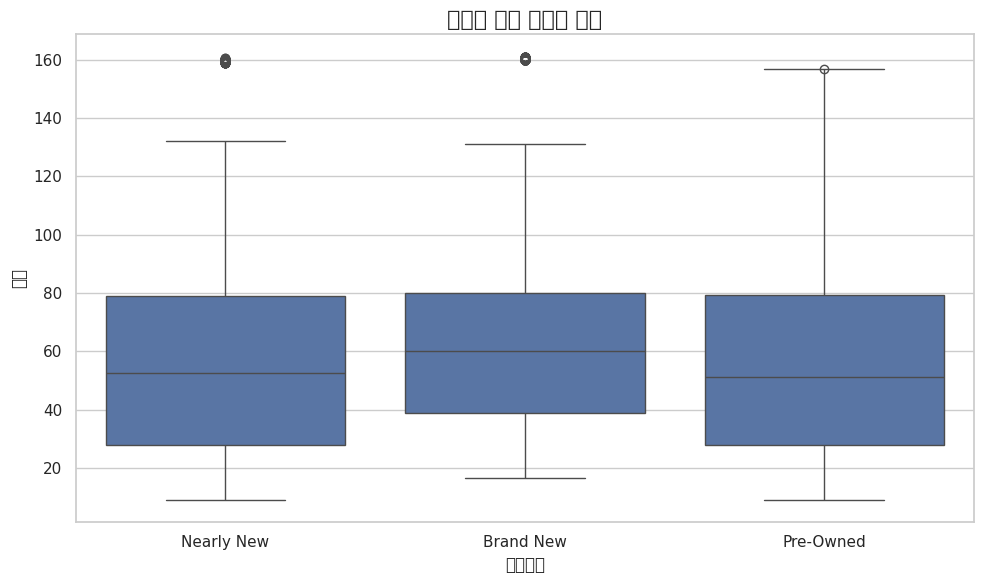

<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-69-3f23088d98cc>:34: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

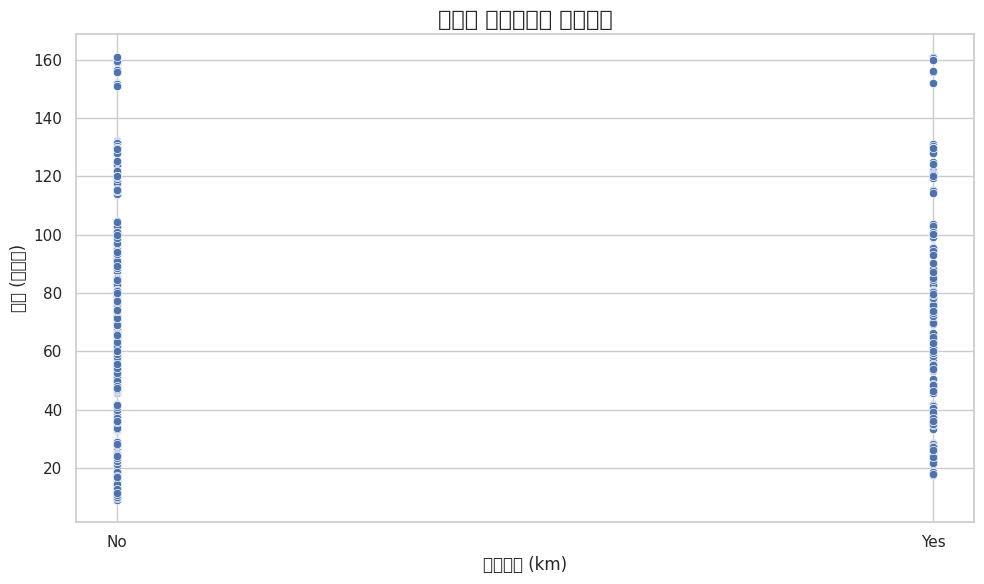

In [69]:
# Set visualization style
sns.set(style="whitegrid")

# 1. 가격과 제조사별 분포
plt.figure(figsize=(12, 6))
sns.boxplot(x='제조사', y='가격', data=train)
plt.xticks(rotation=45)
plt.title('가격과 제조사별 분포', fontsize=16)
plt.tight_layout()
plt.show()

# 2. 가격과 배터리 용량의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='배터리용량', y='가격', data=train)
plt.title('가격과 배터리 용량의 상관관계', fontsize=16)
plt.xlabel('배터리 용량')
plt.ylabel('가격')
plt.tight_layout()
plt.show()

# 3. 가격과 차량 상태의 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='차량상태', y='가격', data=train)
plt.title('가격과 차량 상태의 분포', fontsize=16)
plt.tight_layout()
plt.show()

# 4. 가격과 주행거리의 상관관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='사고이력', y='가격', data=train)
plt.title('가격과 주행거리의 상관관계', fontsize=16)
plt.xlabel('주행거리 (km)')
plt.ylabel('가격 (백만원)')
plt.tight_layout()
plt.show()

In [70]:
# 일단 모든 피처를 사용해서 모델을 만들어 보겠다
# 데이터 전처리 과정
print(train.isnull().sum())
print(test.isnull().sum())

제조사         0
모델          0
차량상태        0
배터리용량    2711
구동방식        0
주행거리        0
보증기간        0
사고이력        0
연식          0
가격          0
dtype: int64
제조사        0
모델         0
차량상태       0
배터리용량    304
구동방식       0
주행거리       0
보증기간       0
사고이력       0
연식         0
dtype: int64


In [71]:
# 평균으로 NULL값 제거
train['배터리용량'] = train['배터리용량'].fillna(train['배터리용량'].mean())
test['배터리용량'] = test['배터리용량'].fillna(test['배터리용량'].mean())

# 차량 상태랑 사고이력은 라벨 인코딩 하고 나머지는 원핫 인코딩해주자

In [72]:
train['차량상태'] = train['차량상태'].map({
    'Brand New' : 2,
    'Nearly New' : 1,
    'Pre-Owned' : 0
})
train['사고이력'] = train['사고이력'].map({
    'No' : 0,
    'Yes' : 1
})

In [73]:
test['차량상태'] = test['차량상태'].map({
    'Brand New' : 2,
    'Nearly New' : 1,
    'Pre-Owned' : 0
})
test['사고이력'] = test['사고이력'].map({
    'No' : 0,
    'Yes' : 1
})

In [74]:
train.head()

,제조사,모델,차량상태,배터리용량,구동방식,주행거리,보증기간,사고이력,연식,가격
0,P사,TayGTS,1,86.077000,AWD,13642,0,0,2,159.66
1,K사,Niro,1,56.000000,FWD,10199,6,0,0,28.01
2,A사,eT,2,91.200000,AWD,2361,7,0,0,66.27
3,A사,RSeTGT,1,69.397187,AWD,21683,3,0,0,99.16
4,B사,i5,0,61.018000,AWD,178205,1,0,0,62.02


In [75]:
train_encoded = pd.get_dummies(data = train,columns = ['제조사','모델','구동방식'])
test_encoded = pd.get_dummies(data = test,columns = ['제조사','모델','구동방식'])

In [77]:
target = train_encoded.pop('가격')

In [86]:
import lightgbm
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

lgm_model = lightgbm.LGBMRegressor()
xgb_model = xgboost.XGBRegressor()
xgbrf_model = xgboost.XGBRFRegressor()

x_train,x_val,y_train,y_val = train_test_split(train_encoded,target,test_size = 0.2)

lgm_model.fit(x_train,y_train)
xgb_model.fit(x_train,y_train)
xgbrf_model.fit(x_train,y_train)

lgm_model_pred = lgm_model.predict(x_val)
xgb_model_pred = xgb_model.predict(x_val)
xgbrf_model_pred = xgbrf_model.predict(x_val)

print(root_mean_squared_error(y_val,lgm_model_pred),root_mean_squared_error(y_val,xgb_model_pred),root_mean_squared_error(y_val,xgbrf_model_pred))
#1.2828988506548118 1.400614647434944 5.235874250233385


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 37
[LightGBM] [Info] Start training from score 62.592678
1.2828988506548118 1.400614647434944 5.235874250233385


# lightgbm 모델이 가장 높으므로 베이스 모델로 채택! 일단 1차 제출을 해보자

In [90]:
# 그전에 일단 val 데이터 까지 학습 시키자!

lgm_model = lightgbm.LGBMRegressor()
lgm_model.fit(train_encoded,target)

pred = lgm_model.predict(test_encoded)

submit = pd.DataFrame({'ID' : test_id,'가격(백만원)' :  pred})

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 7497, number of used features: 37
[LightGBM] [Info] Start training from score 62.331949


In [91]:
submit.to_csv('submission.csv',index= False)

# 제출 결과 0.9602482972 의 점수를 얻었다. 1등의 점수가 0.7~이므로 더 성능을 높여보자
